In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF.head(3))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2


In [2]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transfromed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transfromed[:,0]
irisDF['pca_y'] = pca_transfromed[:,1]
print(irisDF.head(3))

   sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0           5.1          3.5           1.4          0.2       0        1   
1           4.9          3.0           1.4          0.2       0        1   
2           4.7          3.2           1.3          0.2       0        1   

      pca_x     pca_y  
0 -2.684126  0.319397  
1 -2.714142 -0.177001  
2 -2.888991 -0.144949  


In [7]:
print(irisDF.loc[irisDF[irisDF['cluster']==0].index,'pca_x'])

50     1.284826
51     0.932489
53     0.183318
54     1.088103
55     0.641669
         ...   
133    1.444161
138    1.169326
142    1.415236
146    1.527167
149    1.390189
Name: pca_x, Length: 62, dtype: float64


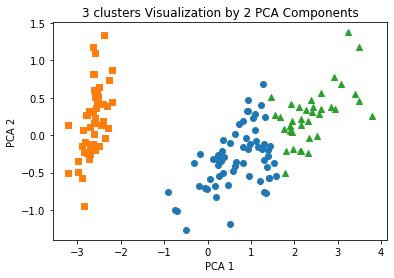

In [12]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출.
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters Visualization by 2 PCA Components')
plt.show()
            

In [24]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=1.2,random_state=0)
print(X.shape,y.shape)

(200, 2) (200,)


In [25]:
# y target값의 분포를 확인

unique,counts = np.unique(y,return_counts=True)
print(unique,counts)

[0 1 2] [67 67 66]


In [15]:
import pandas as pd

clusterDF = pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
print(clusterDF.head(3))

       ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0


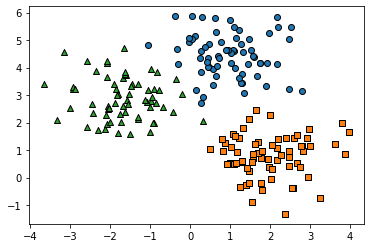

In [16]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는[0,1,2]
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolors='k',marker=markers[target])
plt.show()

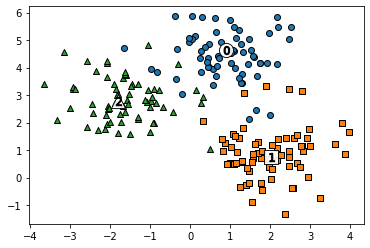

In [26]:
#KMeans 객체를 이용해 X데이터를 K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출  
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolors='k',marker=markers[label])
    
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolors='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolors='k',marker='$%d$' %label)

plt.show()

In [23]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [28]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data,columns=feature_names)
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함  
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples()return값의 shape',score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함 
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
print(irisDF.head(3))

silhouette_samples()return값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553
   sepal_length  sepal_width  petal_length  petal_width  cluster  \
0           5.1          3.5           1.4          0.2        1   
1           4.9          3.0           1.4          0.2        1   
2           4.7          3.2           1.3          0.2        1   

   silhouette_coeff  
0          0.852955  
1          0.815495  
2          0.829315  


In [29]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [30]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [32]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [33]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth값:',round(bandwidth,3))

bandwidth값: 1.816


In [34]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


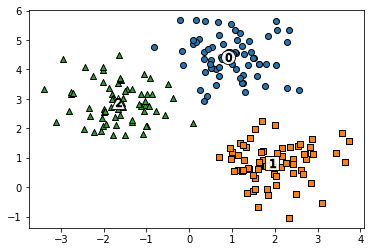

In [36]:
clusterDF['meanshift_label'] = cluster_labels

centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolors='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolors='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolors='k',marker='$%d$' %label)

plt.show()

In [37]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


In [38]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [39]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매칭됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [40]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


In [41]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

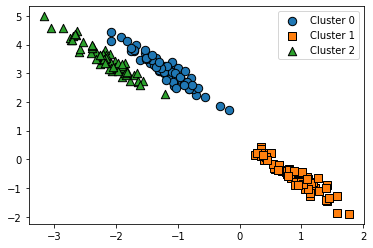

In [42]:
#make_blobs()로 300개의 데이터 세트,3개의 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.5,random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.   
transformation = [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X,transformation)
#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target'] = y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)




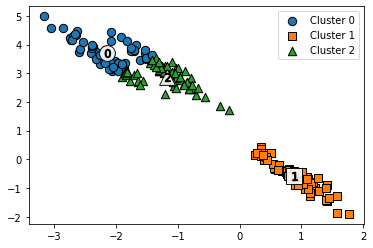

In [43]:
#3개의 군집 기반 Kmeans를 X_ansio 데이터 세트에 적용
kmeans = KMeans(3,random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

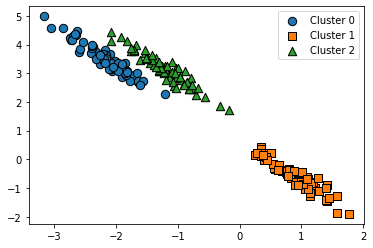

In [44]:
#3개의 n_components 기반 GMM을 X_aniso데이터 세트를 적용
gmm = GaussianMixture(n_components=3,random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

In [45]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2               50
        0               17
1       1               67
2       0               53
        2               13
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            67
1       1            67
2       0            66
Name: gmm_label, dtype: int64


In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


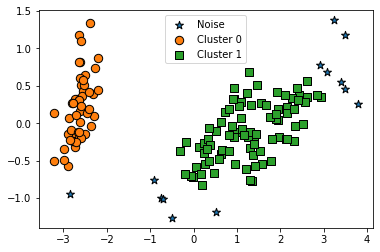

In [49]:
from sklearn.decomposition import PCA

#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 반환
pca = PCA(n_components=2,random_state=0)
pca_transfromed = pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1,ftr2 칼럼을 좌쵸에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transfromed[:,0]
irisDF['ftr2'] = pca_transfromed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


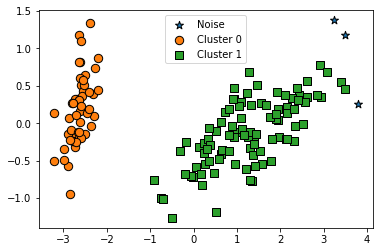

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


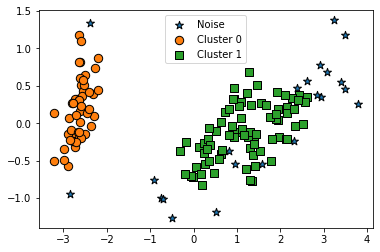

In [54]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


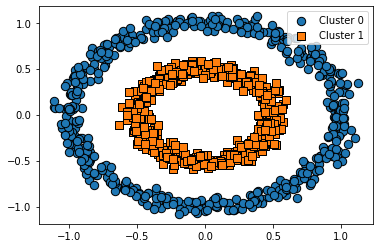

In [55]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

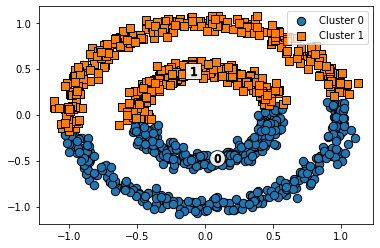

In [56]:
#KMeans로 make_circles()데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)


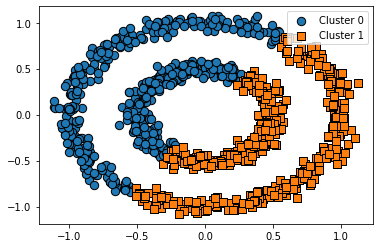

In [57]:
#GMM으로 make_circles()데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

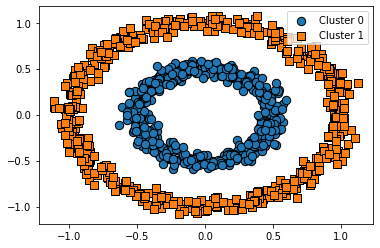

In [58]:
#DBSCAN으로 make_circles()데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)